<a href="https://colab.research.google.com/github/ChahineBA/Data-Science-London-Scikit-learn/blob/main/Data_Science_London_%2B_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, zero_one_loss

# Read Data

In [ ]:
testdf = pd.read_csv('/content/test.csv',header= None)
traindf = pd.read_csv('/content/train.csv',header= None)
labels = pd.read_csv('/content/trainLabels.csv',header= None)[0]

In [ ]:
testdf

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.171644,-0.806952,-2.045671,0.021156,2.258491,0.429469,0.857187,0.972600,1.707492,1.676370,...,-1.366312,0.276543,-0.732764,0.243930,-1.151233,-0.274298,0.573013,1.109814,-1.905965,1.457601
8996,1.168564,-0.911253,1.685492,0.867183,3.606170,-0.673875,-1.889365,0.411385,-0.206817,-0.705771,...,0.557757,0.379841,-1.474198,-0.322943,1.964519,0.122384,0.678023,2.024129,0.386542,1.104493
8997,0.052274,-1.736558,-0.263699,-0.219329,8.918393,-1.258320,-3.361146,0.893366,-0.631669,1.887286,...,2.117847,-1.050824,0.182872,0.242725,0.670161,0.112752,-3.006949,1.179606,1.156340,-1.218561
8998,1.443659,0.651892,0.550724,-1.146664,2.621641,-0.867143,0.312742,1.078004,-1.212524,-0.028143,...,0.631480,1.186236,-1.098508,1.159658,-1.957241,0.482533,3.777669,-0.424954,1.333374,2.325271


In [ ]:
traindf

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217


In [ ]:
labels

0      1
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    0
Name: 0, Length: 1000, dtype: int64

# Data Proprities

In [ ]:
# Training Data Columns
traindf.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [ ]:
# Training Data Description
traindf.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [ ]:
# Checking missing Data and Data types
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

==> NO MISSING Values in Training Data



In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9000 non-null   float64
 1   1       9000 non-null   float64
 2   2       9000 non-null   float64
 3   3       9000 non-null   float64
 4   4       9000 non-null   float64
 5   5       9000 non-null   float64
 6   6       9000 non-null   float64
 7   7       9000 non-null   float64
 8   8       9000 non-null   float64
 9   9       9000 non-null   float64
 10  10      9000 non-null   float64
 11  11      9000 non-null   float64
 12  12      9000 non-null   float64
 13  13      9000 non-null   float64
 14  14      9000 non-null   float64
 15  15      9000 non-null   float64
 16  16      9000 non-null   float64
 17  17      9000 non-null   float64
 18  18      9000 non-null   float64
 19  19      9000 non-null   float64
 20  20      9000 non-null   float64
 21  21      9000 non-null   float64
 22  

==> no missing values for the test dataset


In [ ]:
labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: 0
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


==> No missing values for the labeled training data

# Numerical & Non-Numerical columns

In [ ]:
# Numerical columns:
numerical = traindf.select_dtypes(include = ['number']).columns
numerical

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [ ]:
# Non-Numerical Columns:
non_numerical = traindf.select_dtypes(exclude = ['number']).columns
non_numerical

Int64Index([], dtype='int64')

==> No non-numerical columns found

# Categorical & Quantitave Columns

In [ ]:
categorical, quantitave = [], []
for i in traindf.columns:
  if len(traindf[i].unique()) > 10:
    quantitave.append(i)
  else:
    categorical.append(i)

In [ ]:
#Quantitave Columns:
quantitave

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [ ]:
# Categorical Columns:
categorical

[]

==> No categorical columns Found

# Data Columns Description

In [ ]:
for i in traindf.columns:
  print((str(i) + ':').center(30))
  print(traindf[i].describe())

              0:              
count    1000.000000
mean        0.025596
std         1.008282
min        -3.365711
25%        -0.669010
50%         0.027895
75%         0.762520
max         3.326246
Name: 0, dtype: float64
              1:              
count    1000.000000
mean       -0.024526
std         1.016298
min        -3.492086
25%        -0.693937
50%        -0.033194
75%         0.682753
max         3.583870
Name: 1, dtype: float64
              2:              
count    1000.000000
mean       -0.024088
std         0.979109
min        -2.695602
25%        -0.698830
50%         0.008145
75%         0.661434
max         2.546507
Name: 2, dtype: float64
              3:              
count    1000.000000
mean       -0.002271
std         0.970575
min        -3.460471
25%        -0.617557
50%         0.002327
75%         0.640743
max         3.088738
Name: 3, dtype: float64
              4:              
count    1000.000000
mean        1.092329
std         4.538834
min       -16.

# Training data Plotting

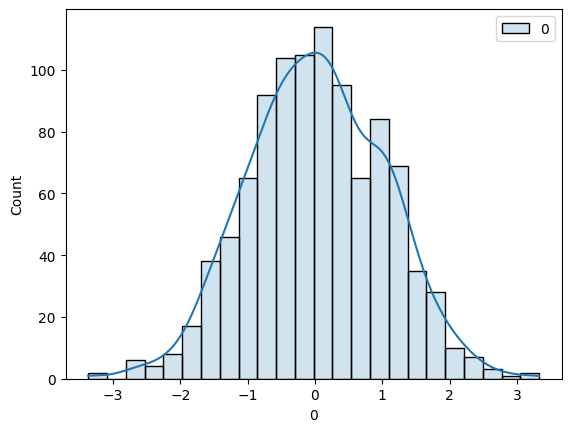

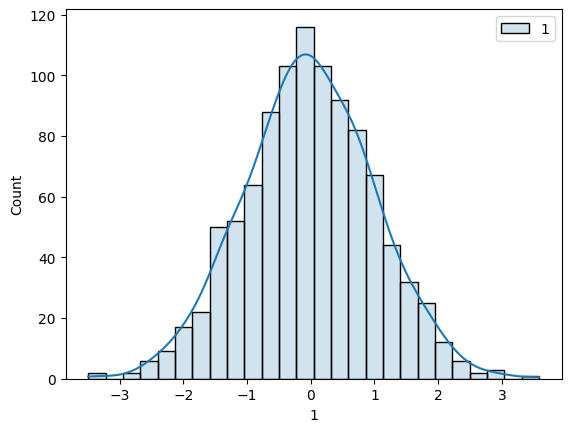

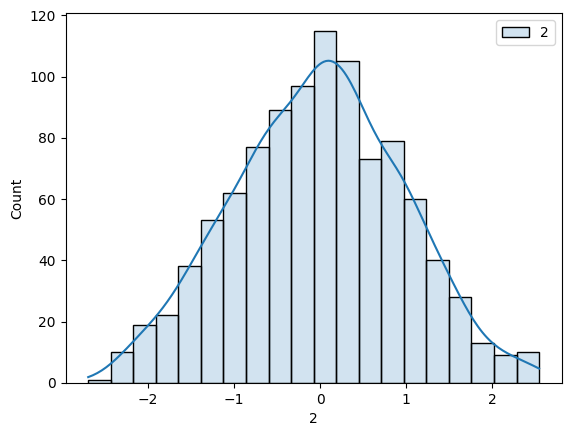

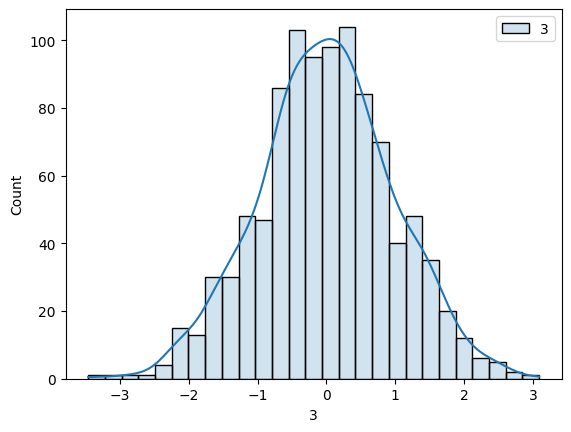

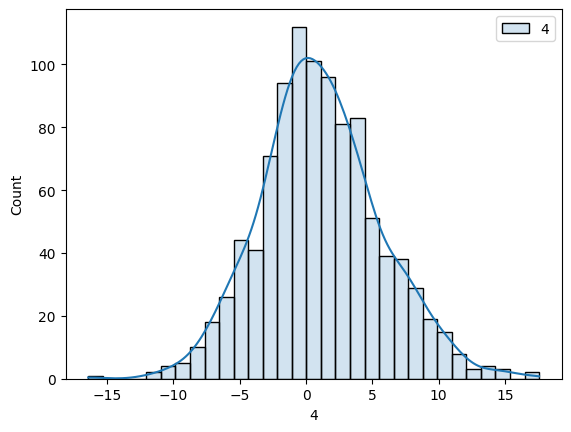

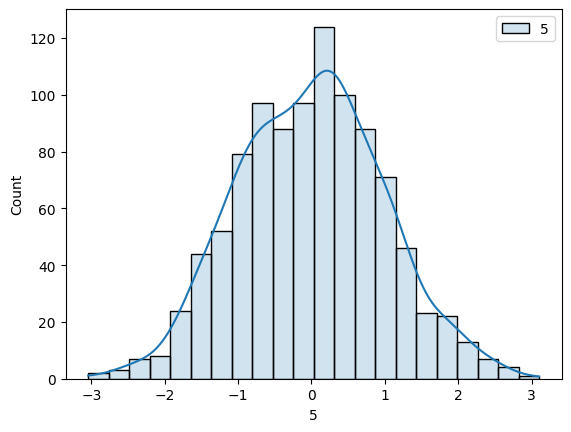

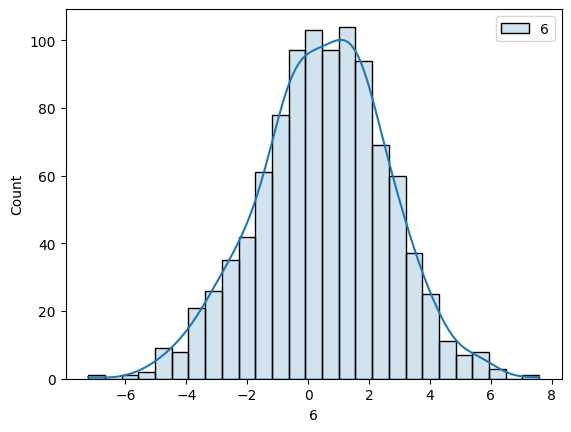

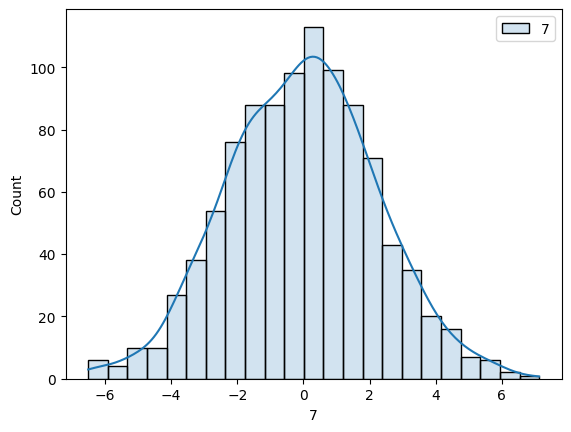

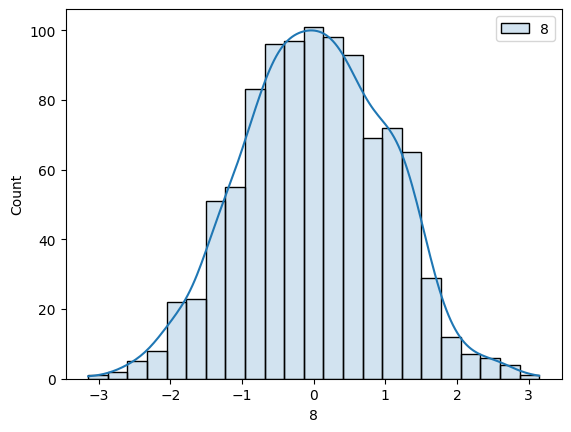

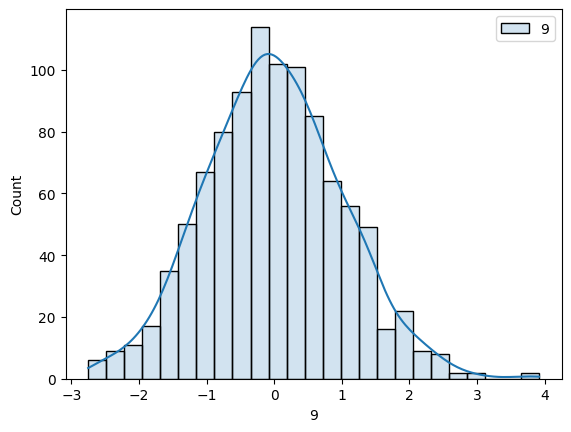

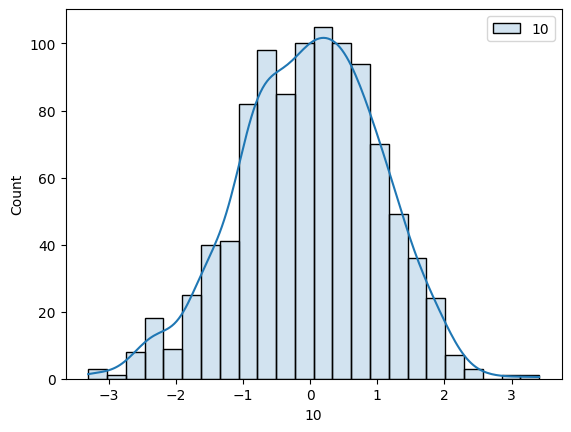

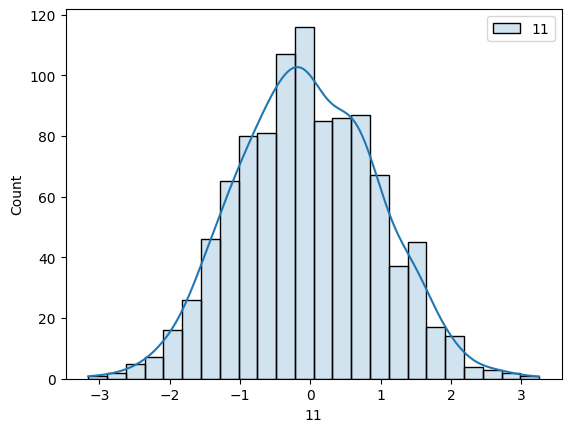

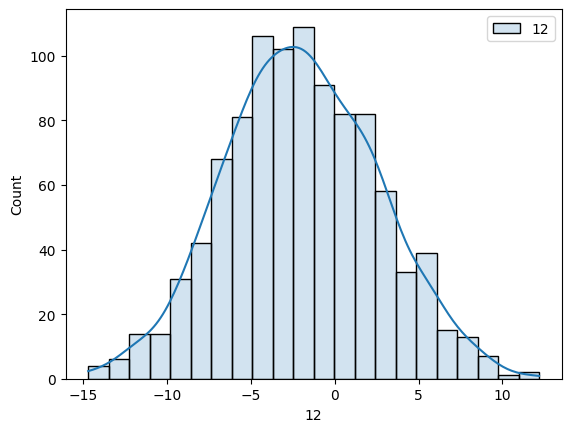

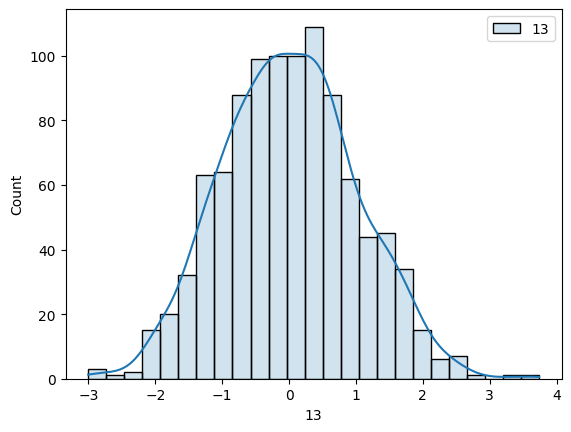

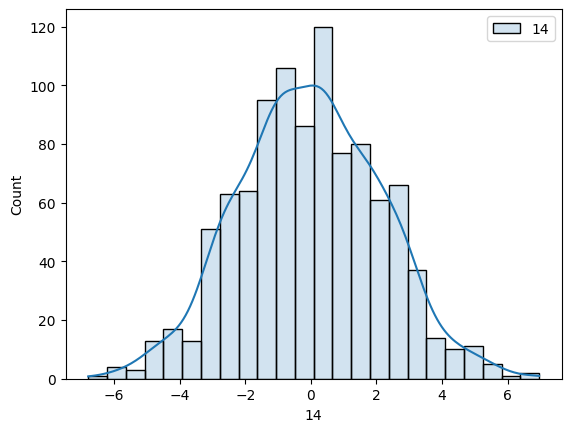

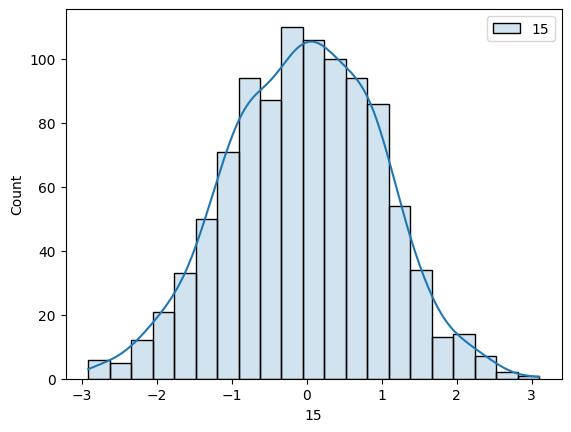

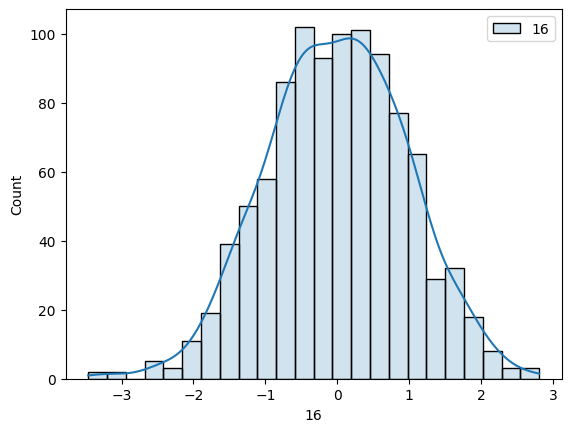

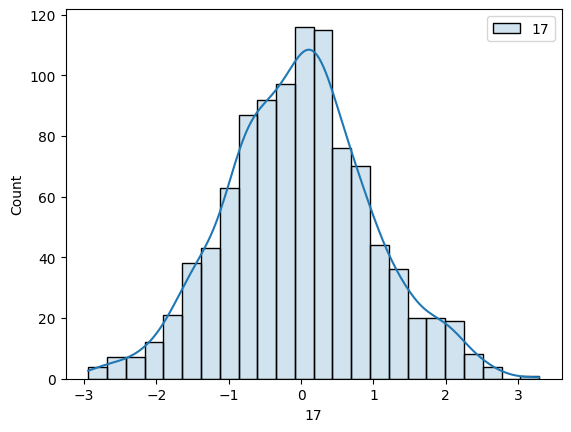

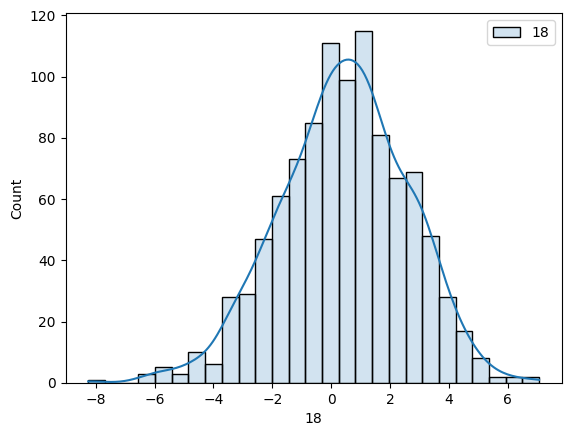

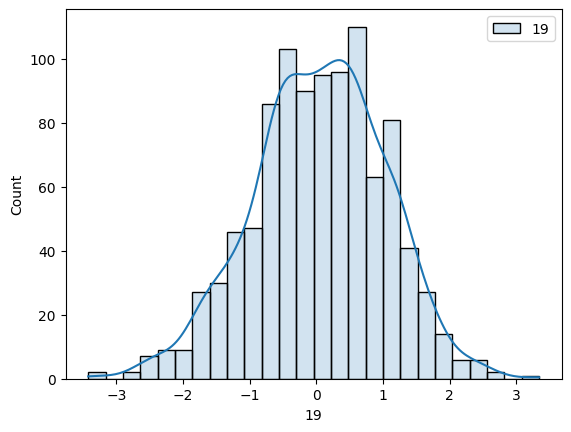

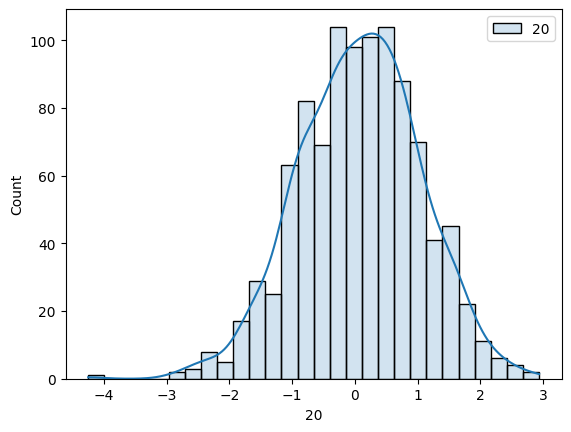

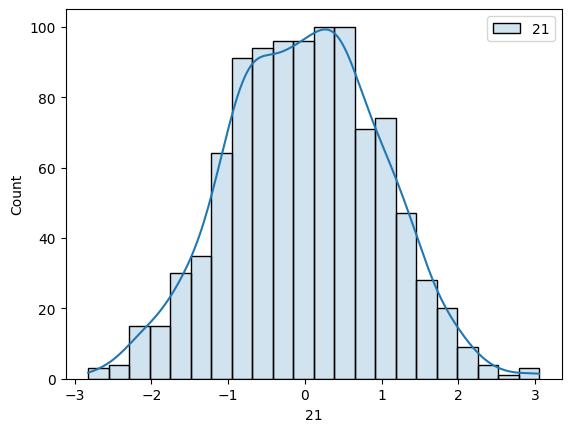

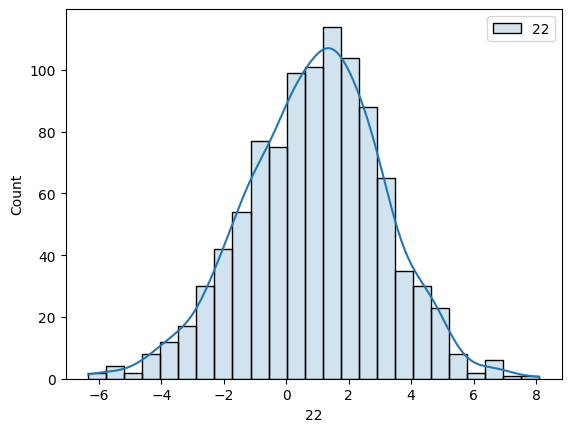

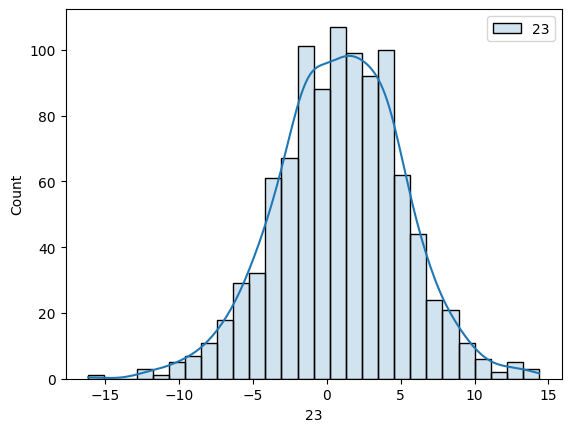

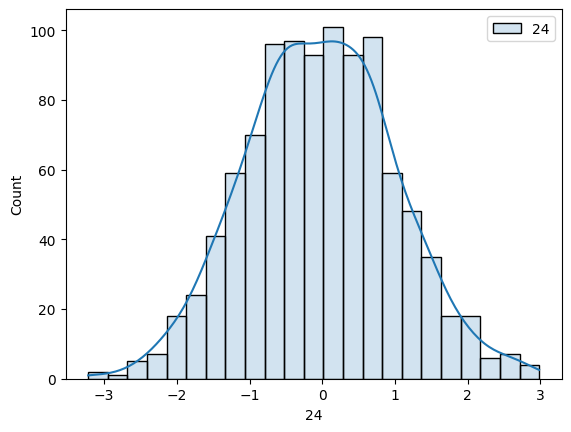

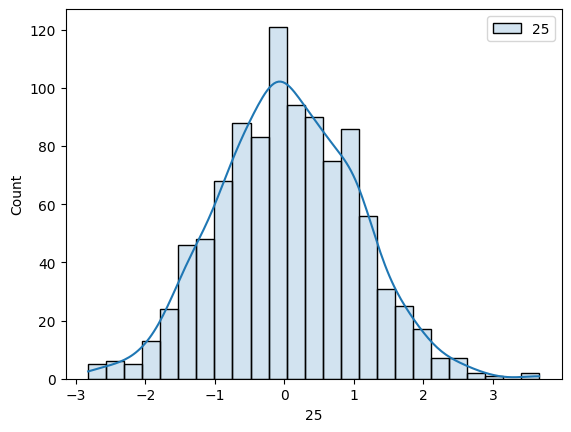

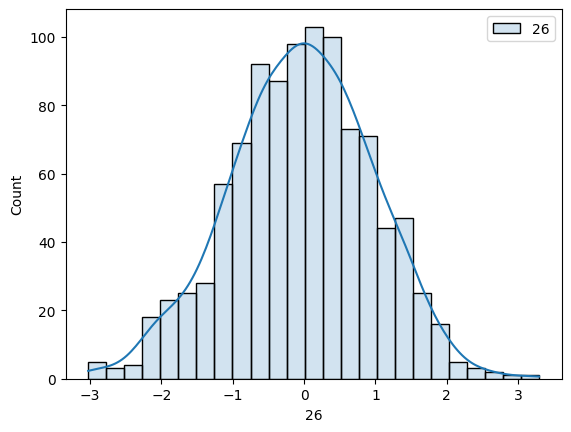

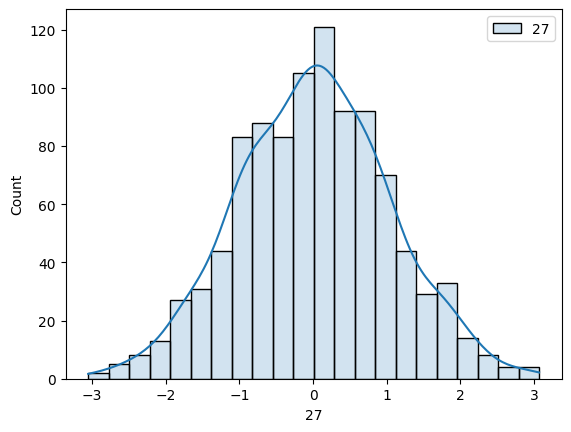

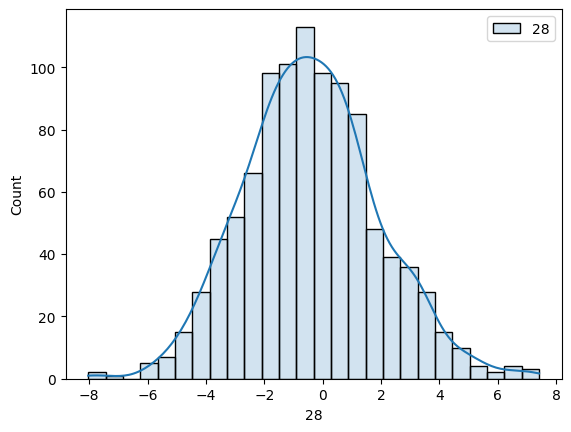

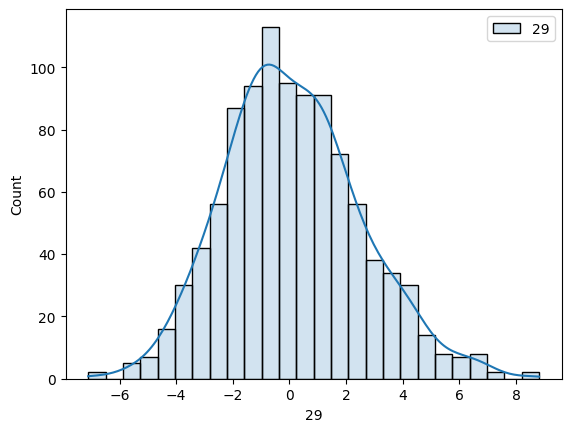

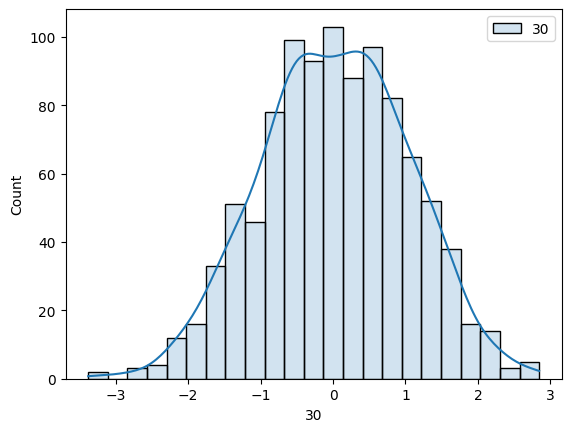

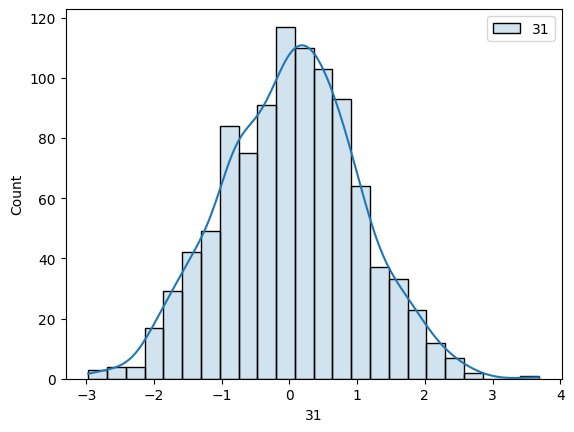

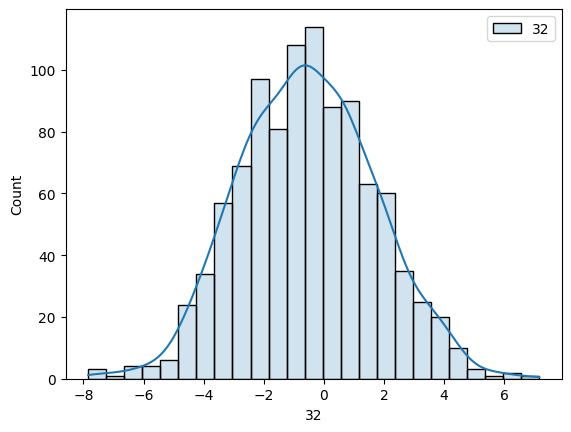

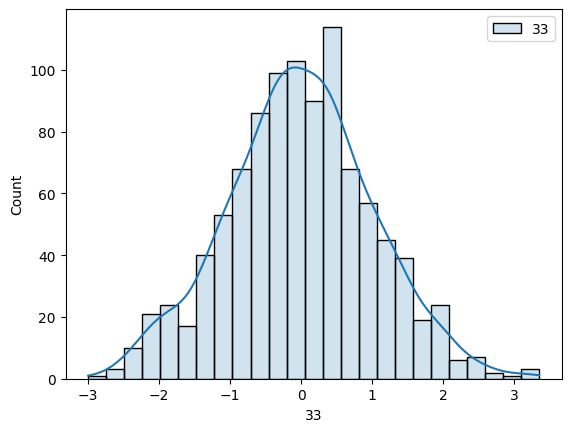

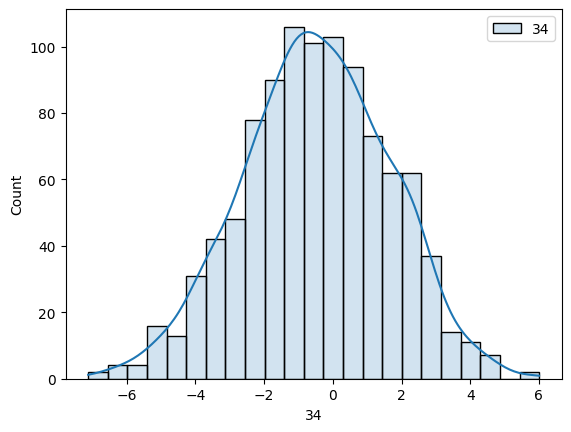

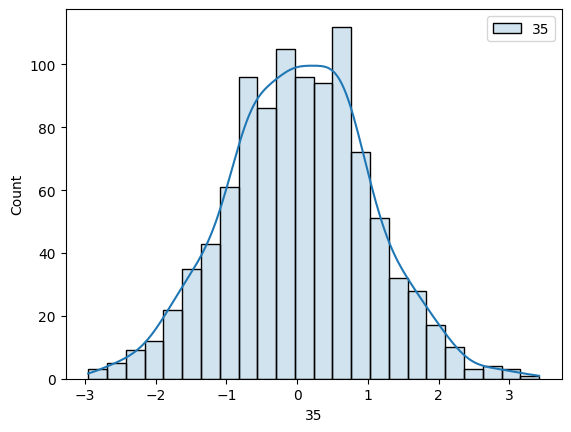

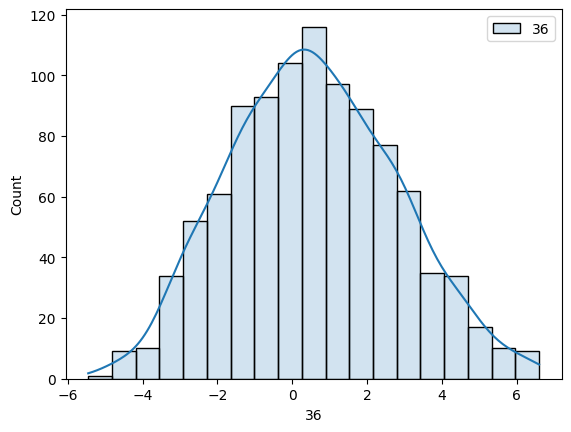

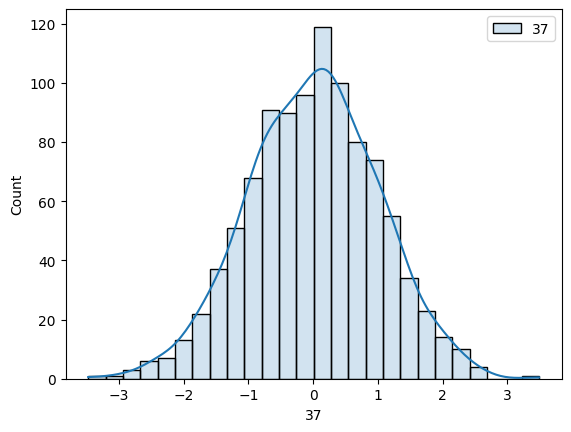

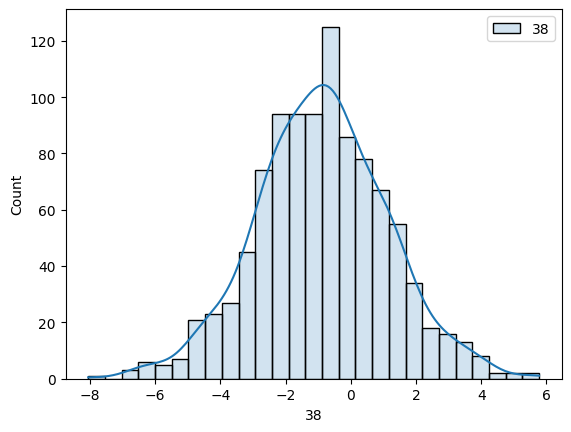

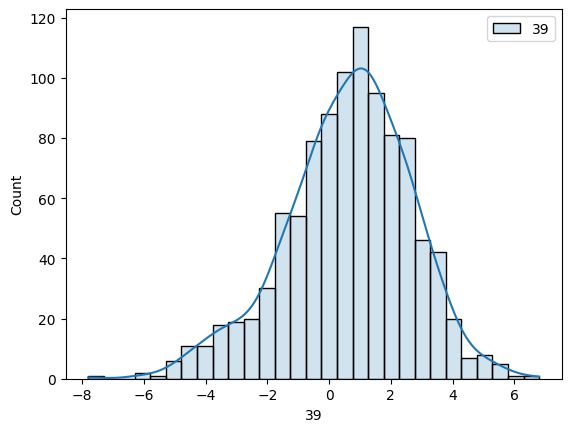

In [ ]:
# Histogram Plotting for the training Dataset
for i in traindf.columns:
  sns.histplot(traindf[i],kde=True,alpha=0.2,label=i)
  plt.legend()
  plt.show()
  print('='*100)

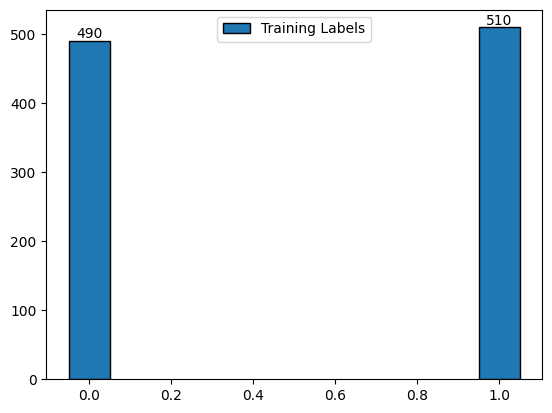

In [ ]:
#Bar plotting for the labels of the training Dataset:
a = labels.unique()
b = labels.value_counts()
plt.bar(a,b,edgecolor='k',width=0.1,label='Training Labels')
for i,j in zip(a,b):
  plt.text(i,j,j,size=10,ha="center",va='bottom')
plt.legend(loc="upper center")
plt.show()

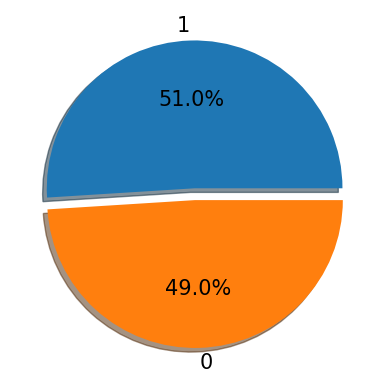

In [ ]:
#Pie Chart Ploting:
plt.pie(b, labels=a, textprops = {'size' : 15} , autopct ='%1.1f%%', explode=[0.04 for  i in a] , shadow = True)
plt.show()

# Correlation Matrix

In [ ]:
#Combining the training Data and the Labels:
train_combine = traindf.copy()
train_combine['label'] = labels
train_combine

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141,0
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567,1
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686,1
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217,0


<Axes: >

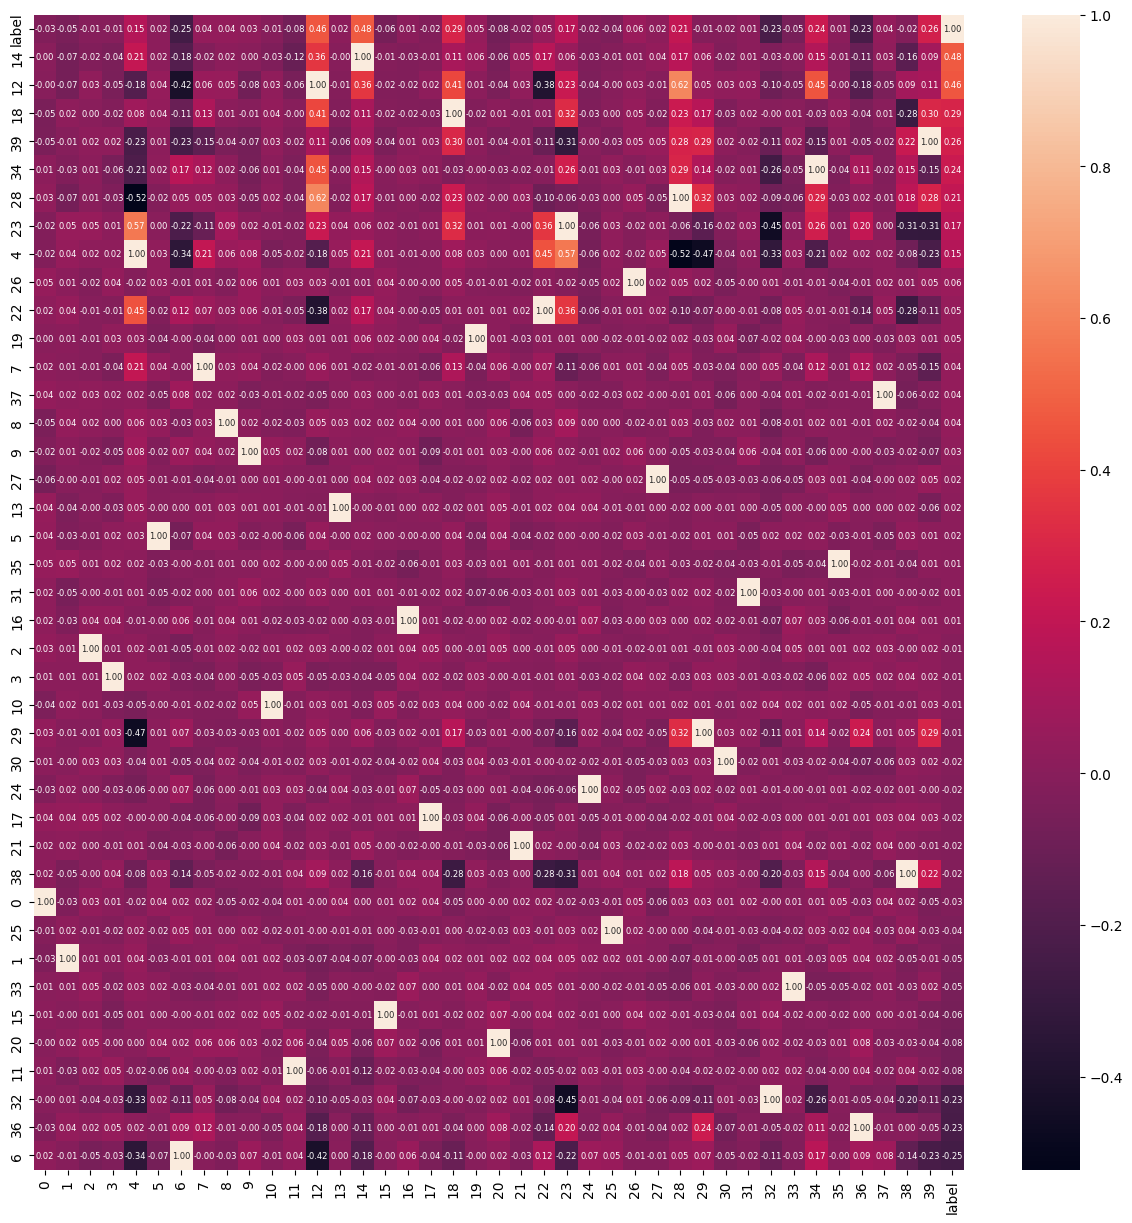

In [ ]:
#Correlation Matrix
corr_mat = train_combine.corr().sort_values(by='label', ascending=False)
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size':6})

# Training & Cross_validation Data split

In [ ]:
#Splitting the training data
X_train, X_val, y_train, y_val = train_test_split(traindf, labels, test_size=0.2,
                                                shuffle=True, random_state=44)
X_val

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
118,-0.236931,0.140670,-1.085205,1.793790,2.876271,0.164815,-0.477650,0.551236,1.640850,-0.407044,...,-1.673055,-1.011055,3.418182,-1.764482,0.115854,-0.546982,1.458852,1.079956,-0.641659,-2.341487
19,-0.052294,-0.404829,0.451713,1.465362,2.748798,0.494106,0.779218,-1.028961,0.356494,-0.946450,...,1.099365,-1.052837,-2.102791,0.019370,-3.297447,0.245613,0.863333,-2.411396,0.369445,0.423435
41,0.458813,0.354811,1.113254,-1.431091,-6.304030,-0.793020,3.539491,2.308075,-0.139480,1.192491,...,-2.017345,1.075393,-2.063513,-0.938403,1.455472,0.454742,0.993040,1.181373,1.120052,2.129827
425,-0.795766,-0.873803,0.377742,-2.158491,-5.000694,-1.012300,2.723356,2.268621,-2.049572,-0.953821,...,1.871079,-0.245060,4.277001,-0.454907,-2.326461,0.167746,0.982115,0.015811,0.583302,2.466811
221,1.663556,-0.153587,0.477992,0.256895,-0.963161,0.243319,-1.438312,1.114523,0.884862,0.450843,...,-0.034220,1.184808,2.365183,0.461787,-1.159705,-0.547306,2.267236,0.828286,-1.420843,-5.520727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1.708599,0.228898,-2.351830,-0.778690,1.099767,1.046673,-0.732820,2.649321,0.445301,1.477195,...,-1.748226,0.638822,1.740708,-0.059755,1.162865,-0.044604,1.675160,-0.256842,-1.712136,-4.406501
744,0.442428,-0.672540,-0.123759,1.963147,5.703682,0.302773,-1.349612,0.647860,-1.433345,0.045780,...,-0.687833,0.721518,-0.840643,0.081183,1.395470,-0.018380,-2.851571,0.823848,2.367989,0.358787
671,-0.470782,0.227952,0.958346,-1.651674,2.402921,0.435837,1.332629,-3.642981,-1.943219,-0.565211,...,0.302740,-1.264575,-1.430314,-0.412696,-2.209828,0.725229,0.003655,1.321473,-2.680314,0.947312
286,0.733037,-0.147103,0.878043,-0.565312,-3.564498,0.520578,-1.243149,-1.654122,0.087484,0.878785,...,0.287282,0.144744,-0.655242,-0.042774,-0.458307,-0.464624,-3.109730,-1.721390,-0.639986,1.774623


# Hyperparmeter Tuning

In [ ]:
#Logistic Regression
logReg = LogisticRegression()
dictionary = {'C':range(1,20,1)}
grid = GridSearchCV(logReg, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

LogisticRegression(C=4)

In [ ]:
# Decision Tree
DT = DecisionTreeClassifier()
dictionary = {'criterion':['entropy', 'log_loss','gini'], 'max_depth':range(2,20,1),
              'max_features':range(10,40,5), 'min_samples_split':range(2,20,1)}
randomized = RandomizedSearchCV(DT, dictionary, n_iter=50)
randomized.fit(X_train, y_train)
randomized.best_estimator_

DecisionTreeClassifier(max_depth=17, max_features=25, min_samples_split=11)

In [ ]:
# Random Forest
RF = RandomForestClassifier()
dictionary = {'n_estimators':range(10,110,10), 'criterion':['entropy', 'log_loss','gini'],
              'max_depth':range(2,20,1), 'max_features':range(10,40,5), 'min_samples_split':range(2,20,1)}
randomized = RandomizedSearchCV(RF, dictionary, n_iter=50)
randomized.fit(X_train, y_train)
randomized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=15,
                       min_samples_split=17, n_estimators=60)

In [ ]:
# Bernoulli
NB = BernoulliNB()
dictionary = {'alpha':[0.00001,0.00005,0.0001,0.0005,0.001,0.05,0.01,0.05,0.1,0.5]}
grid = GridSearchCV(NB, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

BernoulliNB(alpha=1e-05)

In [ ]:
# SVC
svc = SVC(gamma='scale')
dictionary = {'kernel':['sigmoid', 'rbf', 'poly'], 'C':[0.5,1,2,3], 'degree':[2,3,4,5]}
grid = GridSearchCV(svc, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

SVC(C=2, degree=2)

In [ ]:
# KNN
KNN = KNeighborsClassifier()
dictionary = {'n_neighbors':range(1,12,2), 'weights':['uniform', 'distance']}
grid = GridSearchCV(KNN, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

KNeighborsClassifier()

# Models Definition


In [ ]:
logReg = LogisticRegression(C=4)
DT = DecisionTreeClassifier(criterion='log_loss', max_depth=17, max_features=30,
                       min_samples_split=3)
RF = RandomForestClassifier(criterion='log_loss', max_depth=16, max_features=20,
                       min_samples_split=9)
NB = BernoulliNB(alpha=1e-05)
svc = SVC(C=2, degree=2)
KNN = KNeighborsClassifier()
VC = VotingClassifier(estimators=[('LogisticRegression', logReg), ('DecisionTreeClassifier', DT),
          ('RandomForestClassifier', RF),('BernoulliNB' , NB), ('SVC' , svc), ('KNeighborsClassifier',KNN)])

In [ ]:
Models = {'LogisticRegression':logReg,
          'DecisionTreeClassifier':DT,
          'RandomForestClassifier': RF,
          'BernoulliNB' : NB,
          'SVC' : svc,
          'KNeighborsClassifier' : KNN,
          'VotingClassifier' : VC
         }

# Models Fitting & Evaluating

In [ ]:
best_model = None
best_score = 0.0
for model in Models.keys():
    #Model Fitting
    Models[model].fit(X_train, y_train)
    print(str(model).center(30))

    #_______________________________________________________
    #Prediction
    y_pred = Models[model].predict(X_val)

    #_______________________________________________________
    #metrices
    CM = confusion_matrix(y_val, y_pred)
    F1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred, normalize=False)
    loss = zero_one_loss(y_val, y_pred, normalize=False)
    #_______________________________________________________
    #Score
    print('Training Score:', Models[model].score(X_train, y_train))
    print('Testing Score:', Models[model].score(X_val, y_val))

    #_______________________________________________________
    print()
    if F1 > best_score:
        best_score = F1
        best_model = model
    print('confusion_matrix\n',CM)
    print()
    print('f1_score',F1)
    print('Number of right predictions',accuracy)
    print('Number of wrong predictions',loss)
    print('==========================================================')

      LogisticRegression      
Training Score: 0.84125
Testing Score: 0.78

confusion_matrix
 [[77 19]
 [25 79]]

f1_score 0.7821782178217821
Number of right predictions 156
Number of wrong predictions 44
    DecisionTreeClassifier    
Training Score: 0.99875
Testing Score: 0.72

confusion_matrix
 [[69 27]
 [29 75]]

f1_score 0.7281553398058251
Number of right predictions 144
Number of wrong predictions 56
    RandomForestClassifier    
Training Score: 0.9975
Testing Score: 0.86

confusion_matrix
 [[86 10]
 [18 86]]

f1_score 0.86
Number of right predictions 172
Number of wrong predictions 28
         BernoulliNB          
Training Score: 0.78
Testing Score: 0.755

confusion_matrix
 [[71 25]
 [24 80]]

f1_score 0.7655502392344499
Number of right predictions 151
Number of wrong predictions 49
             SVC              
Training Score: 0.97125
Testing Score: 0.89

confusion_matrix
 [[88  8]
 [14 90]]

f1_score 0.8910891089108911
Number of right predictions 178
Number of wrong predict

In [ ]:
print('Best Model:', best_model)
print('Best Score:', best_score)

Best Model: KNeighborsClassifier
Best Score: 0.9014084507042254


# Feature Selection

In [ ]:
#Model
LR = LogisticRegression()
selector = SelectFromModel(LR)
selector.fit(traindf, labels)

SelectFromModel(estimator=LogisticRegression())

In [ ]:
new_data_train = selector.transform(traindf)
new_data_train =  pd.DataFrame(new_data_train)
new_data_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5.289853,0.663234,0.910415,4.305643,0.088924,0.149111,-0.063959,0.544930,0.712772,-1.833057,0.293024,3.552681,3.305972,-2.715559,-2.682409,0.101050
1,2.199061,-0.093780,-0.539275,-0.679051,0.607362,0.766221,-1.556443,-1.645581,-0.198467,2.038836,0.468579,-0.517657,0.803699,1.213219,1.382932,-1.817761
2,3.658881,-1.240310,-11.851312,-4.862125,-0.903317,-1.078792,-0.091044,-1.033094,-0.254151,-3.360521,0.856988,-2.751451,1.672246,0.656438,-0.932473,2.987436
3,3.125716,-1.092716,0.058990,1.622659,-1.685582,1.337941,1.204808,0.144477,0.673993,-3.480110,-1.065252,2.153133,2.767117,0.215748,0.619645,1.883397
4,3.490142,0.807652,-12.822821,-5.031497,-0.704413,1.573043,0.572905,0.625971,0.412084,0.518579,-0.205029,-4.744566,1.830651,0.870772,-1.894609,0.408332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.877520,0.070937,-7.274557,-0.710082,-1.148152,1.037158,2.562710,1.310133,-0.558187,0.745596,-0.698598,-2.729937,0.372873,1.019092,-2.672811,-0.295141
996,7.599220,-1.112949,5.417043,2.593422,1.044658,-2.666928,0.339940,1.591863,-0.375127,-0.856196,-0.072481,-2.935896,-2.613407,0.036687,2.809310,4.412567
997,13.457812,0.642114,-1.951512,3.724396,-0.112185,0.812165,1.207911,-0.104137,0.129072,-2.754369,1.814864,-4.190105,-2.100125,0.061513,0.895536,0.813686
998,-10.430299,-0.876965,1.674553,-4.599050,0.578349,1.902149,-0.548896,-0.960006,0.005818,0.773876,-0.916066,2.604827,-3.423674,0.229748,-2.311088,-3.422217


In [ ]:
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_data_train, labels, test_size=0.2,
                                                shuffle=True, random_state=44)
new_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
49,-2.148839,0.585484,-6.685551,0.299544,1.402273,-1.736616,-1.128238,-0.218537,-0.048239,-0.934016,-0.435118,0.435957,-2.219642,1.878948,2.134317,-3.536570
479,0.931058,0.074436,1.964107,0.687705,0.255213,-1.416600,0.205432,2.206438,0.452405,-4.481793,0.962955,2.354374,2.486459,1.405213,-1.011891,3.546234
50,1.464479,-0.947311,-2.544857,2.883212,-0.155022,-0.494192,-0.927933,0.111354,-0.462798,2.105044,1.086799,-0.831440,0.457405,0.098440,-0.738191,0.244228
424,-6.213637,1.169239,0.744448,-0.827744,-0.518101,-0.894732,-0.130297,0.435821,1.095960,0.468780,0.101484,1.052502,1.393150,0.206543,-0.785657,2.396399
83,-1.258173,-0.309210,-8.262288,-0.367319,-0.679016,-2.040231,-0.375383,-0.150961,0.232900,0.334658,-1.216211,2.331786,3.955062,1.152927,-1.825358,-1.297283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,-0.014637,-1.794619,-4.352673,0.337728,0.449248,0.546697,1.254062,0.351359,-0.215218,-2.032344,-0.861898,1.962131,-0.129671,-0.386249,-0.560805,-3.904336
173,-1.526191,-0.211502,3.887751,0.067950,-0.014501,1.178255,-1.133405,-0.583396,0.254302,2.813955,-0.057618,-2.272199,-1.824783,-0.975370,-1.923236,5.714463
753,3.321531,2.323314,-7.472360,-1.687090,0.318411,0.352977,0.867062,-0.541300,-1.913522,0.308181,-0.656950,-3.809518,0.462688,0.098753,-1.025369,-0.237759
419,-1.579658,-0.181204,-3.801011,1.817634,0.250491,-0.961611,0.105728,0.339076,-1.423815,0.716231,-1.188663,-0.491970,0.467318,1.104113,-1.817868,1.605401


# New Models Fitting & Evaluating

In [ ]:
best_model = None
best_score = 0.0
for model in Models.keys():
    #Model Fitting
    Models[model].fit(new_X_train, new_y_train)
    print(str(model).center(30))

    #_______________________________________________________
    #Prediction
    new_y_pred = Models[model].predict(new_X_val)

    #_______________________________________________________
    #metrices
    CM = confusion_matrix(new_y_val, new_y_pred)
    F1 = f1_score(new_y_val, new_y_pred)
    accuracy = accuracy_score(new_y_val, new_y_pred, normalize=False)
    loss = zero_one_loss(new_y_val, new_y_pred, normalize=False)
    #_______________________________________________________
    #Score
    print('Training Score:', Models[model].score(new_X_train, new_y_train))
    print('Testing Score:', Models[model].score(new_X_val, new_y_val))

    #_______________________________________________________
    print()
    if F1 > best_score:
        best_score = F1
        best_model = model
    print('confusion_matrix\n',CM)
    print()
    print('f1_score',F1)
    print('Number of right predictions',accuracy)
    print('Number of wrong predictions',loss)
    print('==========================================================')

      LogisticRegression      
Training Score: 0.84625
Testing Score: 0.785

confusion_matrix
 [[77 19]
 [24 80]]

f1_score 0.7881773399014778
Number of right predictions 157
Number of wrong predictions 43
    DecisionTreeClassifier    
Training Score: 0.99875
Testing Score: 0.72

confusion_matrix
 [[68 28]
 [28 76]]

f1_score 0.7307692307692306
Number of right predictions 144
Number of wrong predictions 56
    RandomForestClassifier    
Training Score: 0.99625
Testing Score: 0.78

confusion_matrix
 [[78 18]
 [26 78]]

f1_score 0.78
Number of right predictions 156
Number of wrong predictions 44
         BernoulliNB          
Training Score: 0.76875
Testing Score: 0.76

confusion_matrix
 [[73 23]
 [25 79]]

f1_score 0.766990291262136
Number of right predictions 152
Number of wrong predictions 48
             SVC              
Training Score: 0.9325
Testing Score: 0.82

confusion_matrix
 [[81 15]
 [21 83]]

f1_score 0.821782178217822
Number of right predictions 164
Number of wrong predic

In [ ]:
print('Best Model:', best_model)
print('Best Score:', best_score)

Best Model: SVC
Best Score: 0.821782178217822


# Submission

In [ ]:
svc.fit(X_train, y_train)
submission = pd.DataFrame(svc.predict(testdf), columns=['Solution'])
submission = submission.rename_axis('Id')
submission.index = submission.index + 1
submission

,Solution
Id,
1,1
2,0
3,1
4,0
5,0
...,...
8996,1
8997,1
8998,1


In [ ]:
submission.to_csv("submission.csv")

# Score

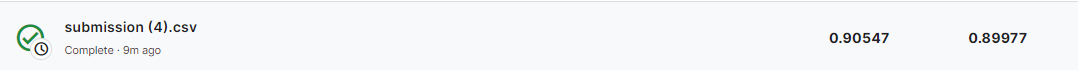